In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix, ConfusionMatrixDisplay,recall_score, precision_recall_curve,f1_score,precision_score
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Import Data

In [120]:
dataset = pd.read_csv(r"data/mydata.csv")

In [121]:
neg, pos = np.bincount(dataset['loanStatus'])
total = neg + pos
print("No. of samples: %d , No. of features: %d"%(dataset.shape[0],dataset.shape[1]))

print('Positive: {} ({:.2f}% of dataset)\nNegative:{} ({:.2f}% of dataset)\n '.format(
    pos, 100 * pos / total, neg,100*neg/total))

No. of samples: 9985 , No. of features: 12
Positive: 390 (3.91% of dataset)
Negative:9595 (96.09% of dataset)
 


The number of samples for class 0 (negative class) is only 390 where class 1 (postive) contains 9595 samples. Measures need to be taken to handle the imbalanced data.

## Class Weights



To handle the imbalanced dataset problem, instead of modifying the number of samples in the dataset, we can input the weights of each class to the model so that it will give more importance to the minority class. Class weights can be calculated using the below formula:
<img src='assets/class_weights_formula.PNG' height=100>

In [122]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = total/(2 * neg)
weight_for_1 = total/(2 * pos)

class_weights = {0: weight_for_0, 1: weight_for_1}

print('Weight for negative class (0) : {:.2f}'.format(weight_for_0))
print('Weight for positive class (1): {:.2f}'.format(weight_for_1))

Weight for negative class (0) : 0.52
Weight for positive class (1): 12.80


## Train/Test Split

In [172]:
y_col = 'loanStatus'
X = dataset[dataset.columns.drop(y_col)]
y = dataset[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Relationship between features



<AxesSubplot:>

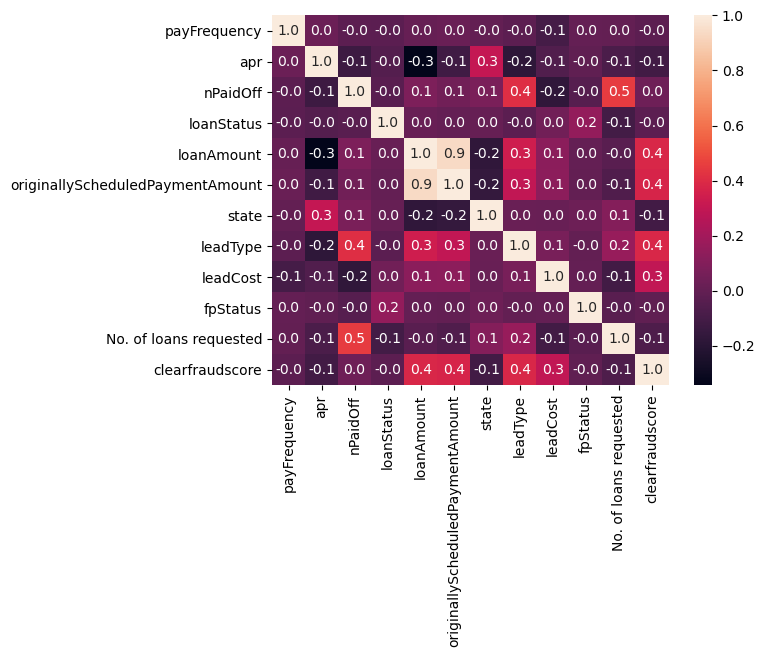

In [181]:
sns.heatmap(dataset.corr(),annot=True,fmt='.1f')

To choose an suitable model, we first need to understand the data. Above shows the correlation of each feature with one another. Most of the features have little to no relationship with one another. 
For the model, random forest is chosen. It is able to handle non-linear relationships well. <br>
Random forest can also identify which feature is important that contribute to loan being defaulted. This can be useful in making informed decisions about loan approval and credit risk assessment. 

## Model Training - Random Forest

### Grid Search to get the best hyperparameters

In [52]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=3)]


# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]


# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

criterion = ['entrophy','gini']

# Create the random grid
grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':criterion
       }
pprint(grid)

{'criterion': ['entrophy', 'gini'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 8],
 'n_estimators': [200, 1100, 2000]}


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(class_weight=class_weights)

rf_random = GridSearchCV(estimator=rf, param_grid=grid,cv=3,
                               verbose=20, n_jobs=1,scoring='f1_weighted')

rf_random.fit(X_train, y_train.ravel())

Fitting 3 folds for each of 594 candidates, totalling 1782 fits
[CV 1/3; 1/594] START criterion=entrophy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/3; 1/594] END criterion=entrophy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3; 1/594] START criterion=entrophy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/3; 1/594] END criterion=entrophy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3; 1/594] START criterion=entrophy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/3; 1/594] END criterion=entrophy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3; 2/594] START criterion=entrophy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1100
[CV 1/3; 2/594] END criterion=entrophy, max_depth=

[CV 1/3; 17/594] END criterion=entrophy, max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=1100;, score=nan total time=   0.0s
[CV 2/3; 17/594] START criterion=entrophy, max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=1100
[CV 2/3; 17/594] END criterion=entrophy, max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=1100;, score=nan total time=   0.0s
[CV 3/3; 17/594] START criterion=entrophy, max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=1100
[CV 3/3; 17/594] END criterion=entrophy, max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=1100;, score=nan total time=   0.0s
[CV 1/3; 18/594] START criterion=entrophy, max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=2000
[CV 1/3; 18/594] END criterion=entrophy, max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=2000;, score=nan total time=   0.0s
[CV 2/3; 18/594] START criterion=entrophy, max_depth=10, min_samples_lea

[CV 3/3; 32/594] END criterion=entrophy, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=nan total time=   0.0s
[CV 1/3; 33/594] START criterion=entrophy, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=2000
[CV 1/3; 33/594] END criterion=entrophy, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=nan total time=   0.0s
[CV 2/3; 33/594] START criterion=entrophy, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=2000
[CV 2/3; 33/594] END criterion=entrophy, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=nan total time=   0.0s
[CV 3/3; 33/594] START criterion=entrophy, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=2000
[CV 3/3; 33/594] END criterion=entrophy, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=nan total time=   0.0s
[CV 1/3; 34/594] START criterion=entrophy, max_depth=20, min_samples_lea

[CV 3/3; 49/594] END criterion=entrophy, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3; 50/594] START criterion=entrophy, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=1100
[CV 1/3; 50/594] END criterion=entrophy, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=nan total time=   0.0s
[CV 2/3; 50/594] START criterion=entrophy, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=1100
[CV 2/3; 50/594] END criterion=entrophy, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=nan total time=   0.0s
[CV 3/3; 50/594] START criterion=entrophy, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=1100
[CV 3/3; 50/594] END criterion=entrophy, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=nan total time=   0.0s
[CV 1/3; 51/594] START criterion=entrophy, max_depth=20, min_samples_leaf

[CV 1/3; 67/594] END criterion=entrophy, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3; 67/594] START criterion=entrophy, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200
[CV 2/3; 67/594] END criterion=entrophy, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3; 67/594] START criterion=entrophy, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200
[CV 3/3; 67/594] END criterion=entrophy, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3; 68/594] START criterion=entrophy, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=1100
[CV 1/3; 68/594] END criterion=entrophy, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=1100;, score=nan total time=   0.0s
[CV 2/3; 68/594] START criterion=entrophy, max_depth=30, min_samples_leaf=2, 

[CV 3/3; 85/594] END criterion=entrophy, max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3; 86/594] START criterion=entrophy, max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=1100
[CV 1/3; 86/594] END criterion=entrophy, max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=nan total time=   0.0s
[CV 2/3; 86/594] START criterion=entrophy, max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=1100
[CV 2/3; 86/594] END criterion=entrophy, max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=nan total time=   0.0s
[CV 3/3; 86/594] START criterion=entrophy, max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=1100
[CV 3/3; 86/594] END criterion=entrophy, max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=nan total time=   0.0s
[CV 1/3; 87/594] START criterion=entrophy, max_depth=40, min_samples_leaf

[CV 2/3; 103/594] END criterion=entrophy, max_depth=40, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3; 103/594] START criterion=entrophy, max_depth=40, min_samples_leaf=4, min_samples_split=5, n_estimators=200
[CV 3/3; 103/594] END criterion=entrophy, max_depth=40, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3; 104/594] START criterion=entrophy, max_depth=40, min_samples_leaf=4, min_samples_split=5, n_estimators=1100
[CV 1/3; 104/594] END criterion=entrophy, max_depth=40, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=nan total time=   0.0s
[CV 2/3; 104/594] START criterion=entrophy, max_depth=40, min_samples_leaf=4, min_samples_split=5, n_estimators=1100
[CV 2/3; 104/594] END criterion=entrophy, max_depth=40, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=nan total time=   0.0s
[CV 3/3; 104/594] START criterion=entrophy, max_depth=40, min_sample

[CV 1/3; 121/594] END criterion=entrophy, max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3; 121/594] START criterion=entrophy, max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=200
[CV 2/3; 121/594] END criterion=entrophy, max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3; 121/594] START criterion=entrophy, max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=200
[CV 3/3; 121/594] END criterion=entrophy, max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3; 122/594] START criterion=entrophy, max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=1100
[CV 1/3; 122/594] END criterion=entrophy, max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=1100;, score=nan total time=   0.0s
[CV 2/3; 122/594] START criterion=entrophy, max_depth=50, min_samples_

[CV 3/3; 138/594] END criterion=entrophy, max_depth=60, min_samples_leaf=1, min_samples_split=2, n_estimators=2000;, score=nan total time=   0.0s
[CV 1/3; 139/594] START criterion=entrophy, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 1/3; 139/594] END criterion=entrophy, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3; 139/594] START criterion=entrophy, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 2/3; 139/594] END criterion=entrophy, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3; 139/594] START criterion=entrophy, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 3/3; 139/594] END criterion=entrophy, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3; 140/594] START criterion=entrophy, max_depth=60, min_samples_l

[CV 3/3; 154/594] END criterion=entrophy, max_depth=60, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3; 155/594] START criterion=entrophy, max_depth=60, min_samples_leaf=4, min_samples_split=2, n_estimators=1100
[CV 1/3; 155/594] END criterion=entrophy, max_depth=60, min_samples_leaf=4, min_samples_split=2, n_estimators=1100;, score=nan total time=   0.0s
[CV 2/3; 155/594] START criterion=entrophy, max_depth=60, min_samples_leaf=4, min_samples_split=2, n_estimators=1100
[CV 2/3; 155/594] END criterion=entrophy, max_depth=60, min_samples_leaf=4, min_samples_split=2, n_estimators=1100;, score=nan total time=   0.0s
[CV 3/3; 155/594] START criterion=entrophy, max_depth=60, min_samples_leaf=4, min_samples_split=2, n_estimators=1100
[CV 3/3; 155/594] END criterion=entrophy, max_depth=60, min_samples_leaf=4, min_samples_split=2, n_estimators=1100;, score=nan total time=   0.0s
[CV 1/3; 156/594] START criterion=entrophy, max_depth=60, min_samp

[CV 3/3; 171/594] END criterion=entrophy, max_depth=70, min_samples_leaf=1, min_samples_split=8, n_estimators=2000;, score=nan total time=   0.0s
[CV 1/3; 172/594] START criterion=entrophy, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 1/3; 172/594] END criterion=entrophy, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3; 172/594] START criterion=entrophy, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 2/3; 172/594] END criterion=entrophy, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3; 172/594] START criterion=entrophy, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 3/3; 172/594] END criterion=entrophy, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3; 173/594] START criterion=entrophy, max_depth=70, min_samples_l

[CV 3/3; 187/594] END criterion=entrophy, max_depth=70, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3; 188/594] START criterion=entrophy, max_depth=70, min_samples_leaf=4, min_samples_split=8, n_estimators=1100
[CV 1/3; 188/594] END criterion=entrophy, max_depth=70, min_samples_leaf=4, min_samples_split=8, n_estimators=1100;, score=nan total time=   0.0s
[CV 2/3; 188/594] START criterion=entrophy, max_depth=70, min_samples_leaf=4, min_samples_split=8, n_estimators=1100
[CV 2/3; 188/594] END criterion=entrophy, max_depth=70, min_samples_leaf=4, min_samples_split=8, n_estimators=1100;, score=nan total time=   0.0s
[CV 3/3; 188/594] START criterion=entrophy, max_depth=70, min_samples_leaf=4, min_samples_split=8, n_estimators=1100
[CV 3/3; 188/594] END criterion=entrophy, max_depth=70, min_samples_leaf=4, min_samples_split=8, n_estimators=1100;, score=nan total time=   0.0s
[CV 1/3; 189/594] START criterion=entrophy, max_depth=70, min_samp

[CV 1/3; 205/594] END criterion=entrophy, max_depth=80, min_samples_leaf=2, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3; 205/594] START criterion=entrophy, max_depth=80, min_samples_leaf=2, min_samples_split=8, n_estimators=200
[CV 2/3; 205/594] END criterion=entrophy, max_depth=80, min_samples_leaf=2, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3; 205/594] START criterion=entrophy, max_depth=80, min_samples_leaf=2, min_samples_split=8, n_estimators=200
[CV 3/3; 205/594] END criterion=entrophy, max_depth=80, min_samples_leaf=2, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3; 206/594] START criterion=entrophy, max_depth=80, min_samples_leaf=2, min_samples_split=8, n_estimators=1100
[CV 1/3; 206/594] END criterion=entrophy, max_depth=80, min_samples_leaf=2, min_samples_split=8, n_estimators=1100;, score=nan total time=   0.0s
[CV 2/3; 206/594] START criterion=entrophy, max_depth=80, min_samples_

[CV 1/3; 221/594] END criterion=entrophy, max_depth=90, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=nan total time=   0.0s
[CV 2/3; 221/594] START criterion=entrophy, max_depth=90, min_samples_leaf=1, min_samples_split=5, n_estimators=1100
[CV 2/3; 221/594] END criterion=entrophy, max_depth=90, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=nan total time=   0.0s
[CV 3/3; 221/594] START criterion=entrophy, max_depth=90, min_samples_leaf=1, min_samples_split=5, n_estimators=1100
[CV 3/3; 221/594] END criterion=entrophy, max_depth=90, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=nan total time=   0.0s
[CV 1/3; 222/594] START criterion=entrophy, max_depth=90, min_samples_leaf=1, min_samples_split=5, n_estimators=2000
[CV 1/3; 222/594] END criterion=entrophy, max_depth=90, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=nan total time=   0.0s
[CV 2/3; 222/594] START criterion=entrophy, max_depth=90, min_sam

[CV 2/3; 237/594] END criterion=entrophy, max_depth=90, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=nan total time=   0.0s
[CV 3/3; 237/594] START criterion=entrophy, max_depth=90, min_samples_leaf=4, min_samples_split=2, n_estimators=2000
[CV 3/3; 237/594] END criterion=entrophy, max_depth=90, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=nan total time=   0.0s
[CV 1/3; 238/594] START criterion=entrophy, max_depth=90, min_samples_leaf=4, min_samples_split=5, n_estimators=200
[CV 1/3; 238/594] END criterion=entrophy, max_depth=90, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3; 238/594] START criterion=entrophy, max_depth=90, min_samples_leaf=4, min_samples_split=5, n_estimators=200
[CV 2/3; 238/594] END criterion=entrophy, max_depth=90, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3; 238/594] START criterion=entrophy, max_depth=90, min_samples

[CV 3/3; 254/594] END criterion=entrophy, max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=1100;, score=nan total time=   0.0s
[CV 1/3; 255/594] START criterion=entrophy, max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=2000
[CV 1/3; 255/594] END criterion=entrophy, max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=nan total time=   0.0s
[CV 2/3; 255/594] START criterion=entrophy, max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=2000
[CV 2/3; 255/594] END criterion=entrophy, max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=nan total time=   0.0s
[CV 3/3; 255/594] START criterion=entrophy, max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=2000
[CV 3/3; 255/594] END criterion=entrophy, max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=nan total time=   0.0s
[CV 1/3; 256/594] START criterion=entrophy, max_depth=100,

[CV 3/3; 270/594] END criterion=entrophy, max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=2000;, score=nan total time=   0.0s
[CV 1/3; 271/594] START criterion=entrophy, max_depth=110, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/3; 271/594] END criterion=entrophy, max_depth=110, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3; 271/594] START criterion=entrophy, max_depth=110, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/3; 271/594] END criterion=entrophy, max_depth=110, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3; 271/594] START criterion=entrophy, max_depth=110, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/3; 271/594] END criterion=entrophy, max_depth=110, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3; 272/594] START criterion=entrophy, max_depth=110, min_s

[CV 2/3; 288/594] END criterion=entrophy, max_depth=110, min_samples_leaf=2, min_samples_split=8, n_estimators=2000;, score=nan total time=   0.0s
[CV 3/3; 288/594] START criterion=entrophy, max_depth=110, min_samples_leaf=2, min_samples_split=8, n_estimators=2000
[CV 3/3; 288/594] END criterion=entrophy, max_depth=110, min_samples_leaf=2, min_samples_split=8, n_estimators=2000;, score=nan total time=   0.0s
[CV 1/3; 289/594] START criterion=entrophy, max_depth=110, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 1/3; 289/594] END criterion=entrophy, max_depth=110, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3; 289/594] START criterion=entrophy, max_depth=110, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 2/3; 289/594] END criterion=entrophy, max_depth=110, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3; 289/594] START criterion=entrophy, max_depth=110, min

[CV 1/3; 299/594] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=0.897 total time=  19.9s
[CV 2/3; 299/594] START criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1100
[CV 2/3; 299/594] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=0.894 total time=  21.7s
[CV 3/3; 299/594] START criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1100
[CV 3/3; 299/594] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=0.889 total time=  20.4s
[CV 1/3; 300/594] START criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=2000
[CV 1/3; 300/594] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=2000;, score=0.896 total time=  35.0s
[CV 2/3; 300/594] START criterion=gini, max_depth=10, min_samples_leaf=1, min_samples

[CV 3/3; 309/594] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.887 total time=  35.9s
[CV 1/3; 310/594] START criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200
[CV 1/3; 310/594] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.897 total time=   3.7s
[CV 2/3; 310/594] START criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200
[CV 2/3; 310/594] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.893 total time=   3.7s
[CV 3/3; 310/594] START criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200
[CV 3/3; 310/594] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.886 total time=   3.8s
[CV 1/3; 311/594] START criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split

[CV 2/3; 320/594] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=0.892 total time=  21.0s
[CV 3/3; 320/594] START criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=1100
[CV 3/3; 320/594] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=0.884 total time=  20.9s
[CV 1/3; 321/594] START criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=2000
[CV 1/3; 321/594] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=0.897 total time=  37.4s
[CV 2/3; 321/594] START criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=2000
[CV 2/3; 321/594] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=0.892 total time=  37.6s
[CV 3/3; 321/594] START criterion=gini, max_depth=10, min_samples_leaf=4, min_samples

[CV 1/3; 331/594] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=0.943 total time=   4.0s
[CV 2/3; 331/594] START criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=8, n_estimators=200
[CV 2/3; 331/594] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=0.939 total time=   4.1s
[CV 3/3; 331/594] START criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=8, n_estimators=200
[CV 3/3; 331/594] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=0.939 total time=   4.0s
[CV 1/3; 332/594] START criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=8, n_estimators=1100
[CV 1/3; 332/594] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=8, n_estimators=1100;, score=0.943 total time=  20.5s
[CV 2/3; 332/594] START criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_spli

[CV 3/3; 341/594] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=8, n_estimators=1100;, score=0.940 total time=  21.7s
[CV 1/3; 342/594] START criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=8, n_estimators=2000
[CV 1/3; 342/594] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=8, n_estimators=2000;, score=0.943 total time=  41.7s
[CV 2/3; 342/594] START criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=8, n_estimators=2000
[CV 2/3; 342/594] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=8, n_estimators=2000;, score=0.940 total time=  36.6s
[CV 3/3; 342/594] START criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=8, n_estimators=2000
[CV 3/3; 342/594] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=8, n_estimators=2000;, score=0.940 total time=  37.7s
[CV 1/3; 343/594] START criterion=gini, max_depth=20, min_samples_leaf=4, min_samples

[CV 2/3; 352/594] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.944 total time=   4.8s
[CV 3/3; 352/594] START criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/3; 352/594] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.941 total time=   4.8s
[CV 1/3; 353/594] START criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=1100
[CV 1/3; 353/594] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=0.947 total time=  32.3s
[CV 2/3; 353/594] START criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=1100
[CV 2/3; 353/594] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=0.944 total time=  28.0s
[CV 3/3; 353/594] START criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_sp

[CV 1/3; 363/594] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.947 total time=  50.2s
[CV 2/3; 363/594] START criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=2000
[CV 2/3; 363/594] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.944 total time=  46.7s
[CV 3/3; 363/594] START criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=2000
[CV 3/3; 363/594] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.942 total time=  46.9s
[CV 1/3; 364/594] START criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200
[CV 1/3; 364/594] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.946 total time=   4.5s
[CV 2/3; 364/594] START criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_s

[CV 3/3; 373/594] END criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.936 total time=   4.4s
[CV 1/3; 374/594] START criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=1100
[CV 1/3; 374/594] END criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=0.944 total time=  21.9s
[CV 2/3; 374/594] START criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=1100
[CV 2/3; 374/594] END criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=0.940 total time=  22.9s
[CV 3/3; 374/594] START criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=1100
[CV 3/3; 374/594] END criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=0.939 total time=  22.3s
[CV 1/3; 375/594] START criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_

[CV 2/3; 384/594] END criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.945 total time=  49.9s
[CV 3/3; 384/594] START criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=2000
[CV 3/3; 384/594] END criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.940 total time=  48.6s
[CV 1/3; 385/594] START criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=8, n_estimators=200
[CV 1/3; 385/594] END criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=0.946 total time=   4.7s
[CV 2/3; 385/594] START criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=8, n_estimators=200
[CV 2/3; 385/594] END criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=0.943 total time=   4.6s
[CV 3/3; 385/594] START criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_spl

[CV 1/3; 395/594] END criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=8, n_estimators=1100;, score=0.945 total time=   6.6s
[CV 2/3; 395/594] START criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=8, n_estimators=1100
[CV 2/3; 395/594] END criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=8, n_estimators=1100;, score=0.942 total time=   6.6s
[CV 3/3; 395/594] START criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=8, n_estimators=1100
[CV 3/3; 395/594] END criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=8, n_estimators=1100;, score=0.939 total time=   6.5s
[CV 1/3; 396/594] START criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=8, n_estimators=2000
[CV 1/3; 396/594] END criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=8, n_estimators=2000;, score=0.944 total time=  10.9s
[CV 2/3; 396/594] START criterion=gini, max_depth=40, min_samples_leaf=2, min_samples

[CV 3/3; 405/594] END criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=8, n_estimators=2000;, score=0.937 total time=  10.9s
[CV 1/3; 406/594] START criterion=gini, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/3; 406/594] END criterion=gini, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.947 total time=   1.3s
[CV 2/3; 406/594] START criterion=gini, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/3; 406/594] END criterion=gini, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.944 total time=   1.3s
[CV 3/3; 406/594] START criterion=gini, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/3; 406/594] END criterion=gini, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.941 total time=   1.3s
[CV 1/3; 407/594] START criterion=gini, max_depth=50, min_samples_leaf=1, min_samples_split

[CV 2/3; 416/594] END criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=1100;, score=0.944 total time=   7.3s
[CV 3/3; 416/594] START criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=1100
[CV 3/3; 416/594] END criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=1100;, score=0.941 total time=   7.3s
[CV 1/3; 417/594] START criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=2000
[CV 1/3; 417/594] END criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.947 total time=  13.4s
[CV 2/3; 417/594] START criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=2000
[CV 2/3; 417/594] END criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.944 total time=  13.5s
[CV 3/3; 417/594] START criterion=gini, max_depth=50, min_samples_leaf=2, min_samples

[CV 1/3; 427/594] END criterion=gini, max_depth=50, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.942 total time=   1.2s
[CV 2/3; 427/594] START criterion=gini, max_depth=50, min_samples_leaf=4, min_samples_split=5, n_estimators=200
[CV 2/3; 427/594] END criterion=gini, max_depth=50, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.939 total time=   1.2s
[CV 3/3; 427/594] START criterion=gini, max_depth=50, min_samples_leaf=4, min_samples_split=5, n_estimators=200
[CV 3/3; 427/594] END criterion=gini, max_depth=50, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.935 total time=   1.2s
[CV 1/3; 428/594] START criterion=gini, max_depth=50, min_samples_leaf=4, min_samples_split=5, n_estimators=1100
[CV 1/3; 428/594] END criterion=gini, max_depth=50, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=0.944 total time=   6.2s
[CV 2/3; 428/594] START criterion=gini, max_depth=50, min_samples_leaf=4, min_samples_spli

[CV 3/3; 437/594] END criterion=gini, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=0.941 total time=   8.7s
[CV 1/3; 438/594] START criterion=gini, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=2000
[CV 1/3; 438/594] END criterion=gini, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.946 total time=  16.0s
[CV 2/3; 438/594] START criterion=gini, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=2000
[CV 2/3; 438/594] END criterion=gini, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.944 total time=  15.0s
[CV 3/3; 438/594] START criterion=gini, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=2000
[CV 3/3; 438/594] END criterion=gini, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.940 total time=  14.3s
[CV 1/3; 439/594] START criterion=gini, max_depth=60, min_samples_leaf=1, min_samples

[CV 2/3; 448/594] END criterion=gini, max_depth=60, min_samples_leaf=2, min_samples_split=8, n_estimators=200;, score=0.942 total time=   1.2s
[CV 3/3; 448/594] START criterion=gini, max_depth=60, min_samples_leaf=2, min_samples_split=8, n_estimators=200
[CV 3/3; 448/594] END criterion=gini, max_depth=60, min_samples_leaf=2, min_samples_split=8, n_estimators=200;, score=0.941 total time=   1.2s
[CV 1/3; 449/594] START criterion=gini, max_depth=60, min_samples_leaf=2, min_samples_split=8, n_estimators=1100
[CV 1/3; 449/594] END criterion=gini, max_depth=60, min_samples_leaf=2, min_samples_split=8, n_estimators=1100;, score=0.944 total time=   6.4s
[CV 2/3; 449/594] START criterion=gini, max_depth=60, min_samples_leaf=2, min_samples_split=8, n_estimators=1100
[CV 2/3; 449/594] END criterion=gini, max_depth=60, min_samples_leaf=2, min_samples_split=8, n_estimators=1100;, score=0.941 total time=   6.9s
[CV 3/3; 449/594] START criterion=gini, max_depth=60, min_samples_leaf=2, min_samples_sp

[CV 1/3; 459/594] END criterion=gini, max_depth=60, min_samples_leaf=4, min_samples_split=8, n_estimators=2000;, score=0.943 total time=  11.0s
[CV 2/3; 459/594] START criterion=gini, max_depth=60, min_samples_leaf=4, min_samples_split=8, n_estimators=2000
[CV 2/3; 459/594] END criterion=gini, max_depth=60, min_samples_leaf=4, min_samples_split=8, n_estimators=2000;, score=0.940 total time=  11.0s
[CV 3/3; 459/594] START criterion=gini, max_depth=60, min_samples_leaf=4, min_samples_split=8, n_estimators=2000
[CV 3/3; 459/594] END criterion=gini, max_depth=60, min_samples_leaf=4, min_samples_split=8, n_estimators=2000;, score=0.939 total time=  11.0s
[CV 1/3; 460/594] START criterion=gini, max_depth=70, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/3; 460/594] END criterion=gini, max_depth=70, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.947 total time=   1.6s
[CV 2/3; 460/594] START criterion=gini, max_depth=70, min_samples_leaf=1, min_samples_s

[CV 3/3; 469/594] END criterion=gini, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.942 total time=   1.4s
[CV 1/3; 470/594] START criterion=gini, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=1100
[CV 1/3; 470/594] END criterion=gini, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=1100;, score=0.948 total time=   7.8s
[CV 2/3; 470/594] START criterion=gini, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=1100
[CV 2/3; 470/594] END criterion=gini, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=1100;, score=0.944 total time=   9.3s
[CV 3/3; 470/594] START criterion=gini, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=1100
[CV 3/3; 470/594] END criterion=gini, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=1100;, score=0.942 total time=   8.4s
[CV 1/3; 471/594] START criterion=gini, max_depth=70, min_samples_leaf=2, min_samples_

[CV 2/3; 480/594] END criterion=gini, max_depth=70, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.939 total time=  10.8s
[CV 3/3; 480/594] START criterion=gini, max_depth=70, min_samples_leaf=4, min_samples_split=2, n_estimators=2000
[CV 3/3; 480/594] END criterion=gini, max_depth=70, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.938 total time=  10.9s
[CV 1/3; 481/594] START criterion=gini, max_depth=70, min_samples_leaf=4, min_samples_split=5, n_estimators=200
[CV 1/3; 481/594] END criterion=gini, max_depth=70, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.942 total time=   1.2s
[CV 2/3; 481/594] START criterion=gini, max_depth=70, min_samples_leaf=4, min_samples_split=5, n_estimators=200
[CV 2/3; 481/594] END criterion=gini, max_depth=70, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.941 total time=   1.2s
[CV 3/3; 481/594] START criterion=gini, max_depth=70, min_samples_leaf=4, min_samples_spl

[CV 1/3; 491/594] END criterion=gini, max_depth=80, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=0.947 total time=   8.2s
[CV 2/3; 491/594] START criterion=gini, max_depth=80, min_samples_leaf=1, min_samples_split=5, n_estimators=1100
[CV 2/3; 491/594] END criterion=gini, max_depth=80, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=0.945 total time=   8.6s
[CV 3/3; 491/594] START criterion=gini, max_depth=80, min_samples_leaf=1, min_samples_split=5, n_estimators=1100
[CV 3/3; 491/594] END criterion=gini, max_depth=80, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=0.942 total time=   8.1s
[CV 1/3; 492/594] START criterion=gini, max_depth=80, min_samples_leaf=1, min_samples_split=5, n_estimators=2000
[CV 1/3; 492/594] END criterion=gini, max_depth=80, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.947 total time=  14.8s
[CV 2/3; 492/594] START criterion=gini, max_depth=80, min_samples_leaf=1, min_samples

[CV 3/3; 501/594] END criterion=gini, max_depth=80, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=0.942 total time=  13.3s
[CV 1/3; 502/594] START criterion=gini, max_depth=80, min_samples_leaf=2, min_samples_split=8, n_estimators=200
[CV 1/3; 502/594] END criterion=gini, max_depth=80, min_samples_leaf=2, min_samples_split=8, n_estimators=200;, score=0.945 total time=   1.3s
[CV 2/3; 502/594] START criterion=gini, max_depth=80, min_samples_leaf=2, min_samples_split=8, n_estimators=200
[CV 2/3; 502/594] END criterion=gini, max_depth=80, min_samples_leaf=2, min_samples_split=8, n_estimators=200;, score=0.941 total time=   1.3s
[CV 3/3; 502/594] START criterion=gini, max_depth=80, min_samples_leaf=2, min_samples_split=8, n_estimators=200
[CV 3/3; 502/594] END criterion=gini, max_depth=80, min_samples_leaf=2, min_samples_split=8, n_estimators=200;, score=0.940 total time=   1.3s
[CV 1/3; 503/594] START criterion=gini, max_depth=80, min_samples_leaf=2, min_samples_split

[CV 2/3; 512/594] END criterion=gini, max_depth=80, min_samples_leaf=4, min_samples_split=8, n_estimators=1100;, score=0.940 total time=   6.6s
[CV 3/3; 512/594] START criterion=gini, max_depth=80, min_samples_leaf=4, min_samples_split=8, n_estimators=1100
[CV 3/3; 512/594] END criterion=gini, max_depth=80, min_samples_leaf=4, min_samples_split=8, n_estimators=1100;, score=0.939 total time=   6.9s
[CV 1/3; 513/594] START criterion=gini, max_depth=80, min_samples_leaf=4, min_samples_split=8, n_estimators=2000
[CV 1/3; 513/594] END criterion=gini, max_depth=80, min_samples_leaf=4, min_samples_split=8, n_estimators=2000;, score=0.943 total time=  12.5s
[CV 2/3; 513/594] START criterion=gini, max_depth=80, min_samples_leaf=4, min_samples_split=8, n_estimators=2000
[CV 2/3; 513/594] END criterion=gini, max_depth=80, min_samples_leaf=4, min_samples_split=8, n_estimators=2000;, score=0.940 total time=  11.5s
[CV 3/3; 513/594] START criterion=gini, max_depth=80, min_samples_leaf=4, min_samples

[CV 1/3; 523/594] END criterion=gini, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.947 total time=   1.3s
[CV 2/3; 523/594] START criterion=gini, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 2/3; 523/594] END criterion=gini, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.944 total time=   1.4s
[CV 3/3; 523/594] START criterion=gini, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 3/3; 523/594] END criterion=gini, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.941 total time=   1.4s
[CV 1/3; 524/594] START criterion=gini, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=1100
[CV 1/3; 524/594] END criterion=gini, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=1100;, score=0.947 total time=   8.0s
[CV 2/3; 524/594] START criterion=gini, max_depth=90, min_samples_leaf=2, min_samples_spli

[CV 3/3; 533/594] END criterion=gini, max_depth=90, min_samples_leaf=4, min_samples_split=2, n_estimators=1100;, score=0.938 total time=   6.5s
[CV 1/3; 534/594] START criterion=gini, max_depth=90, min_samples_leaf=4, min_samples_split=2, n_estimators=2000
[CV 1/3; 534/594] END criterion=gini, max_depth=90, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.943 total time=  10.9s
[CV 2/3; 534/594] START criterion=gini, max_depth=90, min_samples_leaf=4, min_samples_split=2, n_estimators=2000
[CV 2/3; 534/594] END criterion=gini, max_depth=90, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.939 total time=  11.1s
[CV 3/3; 534/594] START criterion=gini, max_depth=90, min_samples_leaf=4, min_samples_split=2, n_estimators=2000
[CV 3/3; 534/594] END criterion=gini, max_depth=90, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.937 total time=  11.1s
[CV 1/3; 535/594] START criterion=gini, max_depth=90, min_samples_leaf=4, min_samples

[CV 2/3; 544/594] END criterion=gini, max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.944 total time=   1.3s
[CV 3/3; 544/594] START criterion=gini, max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 3/3; 544/594] END criterion=gini, max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.941 total time=   1.3s
[CV 1/3; 545/594] START criterion=gini, max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=1100
[CV 1/3; 545/594] END criterion=gini, max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=0.947 total time=   7.6s
[CV 2/3; 545/594] START criterion=gini, max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=1100
[CV 2/3; 545/594] END criterion=gini, max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=0.945 total time=   7.7s
[CV 3/3; 545/594] START criterion=gini, max_depth=100, min_samples_leaf=1, min_sa

[CV 1/3; 555/594] END criterion=gini, max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=0.948 total time=  13.0s
[CV 2/3; 555/594] START criterion=gini, max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=2000
[CV 2/3; 555/594] END criterion=gini, max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=0.944 total time=  12.9s
[CV 3/3; 555/594] START criterion=gini, max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=2000
[CV 3/3; 555/594] END criterion=gini, max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=0.942 total time=  12.6s
[CV 1/3; 556/594] START criterion=gini, max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=200
[CV 1/3; 556/594] END criterion=gini, max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=200;, score=0.946 total time=   1.2s
[CV 2/3; 556/594] START criterion=gini, max_depth=100, min_samples_leaf=2, min_s

[CV 3/3; 565/594] END criterion=gini, max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.939 total time=   1.2s
[CV 1/3; 566/594] START criterion=gini, max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=1100
[CV 1/3; 566/594] END criterion=gini, max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=1100;, score=0.943 total time=   6.3s
[CV 2/3; 566/594] START criterion=gini, max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=1100
[CV 2/3; 566/594] END criterion=gini, max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=1100;, score=0.940 total time=   6.4s
[CV 3/3; 566/594] START criterion=gini, max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=1100
[CV 3/3; 566/594] END criterion=gini, max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=1100;, score=0.937 total time=   6.5s
[CV 1/3; 567/594] START criterion=gini, max_depth=100, min_samples_leaf=4, min_

[CV 2/3; 576/594] END criterion=gini, max_depth=110, min_samples_leaf=1, min_samples_split=8, n_estimators=2000;, score=0.943 total time=  11.6s
[CV 3/3; 576/594] START criterion=gini, max_depth=110, min_samples_leaf=1, min_samples_split=8, n_estimators=2000
[CV 3/3; 576/594] END criterion=gini, max_depth=110, min_samples_leaf=1, min_samples_split=8, n_estimators=2000;, score=0.940 total time=  11.4s
[CV 1/3; 577/594] START criterion=gini, max_depth=110, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 1/3; 577/594] END criterion=gini, max_depth=110, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.947 total time=   1.3s
[CV 2/3; 577/594] START criterion=gini, max_depth=110, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 2/3; 577/594] END criterion=gini, max_depth=110, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.945 total time=   1.3s
[CV 3/3; 577/594] START criterion=gini, max_depth=110, min_samples_leaf=2, min_sam

[CV 1/3; 587/594] END criterion=gini, max_depth=110, min_samples_leaf=4, min_samples_split=2, n_estimators=1100;, score=0.943 total time=   6.4s
[CV 2/3; 587/594] START criterion=gini, max_depth=110, min_samples_leaf=4, min_samples_split=2, n_estimators=1100
[CV 2/3; 587/594] END criterion=gini, max_depth=110, min_samples_leaf=4, min_samples_split=2, n_estimators=1100;, score=0.939 total time=   6.8s
[CV 3/3; 587/594] START criterion=gini, max_depth=110, min_samples_leaf=4, min_samples_split=2, n_estimators=1100
[CV 3/3; 587/594] END criterion=gini, max_depth=110, min_samples_leaf=4, min_samples_split=2, n_estimators=1100;, score=0.937 total time=   6.5s
[CV 1/3; 588/594] START criterion=gini, max_depth=110, min_samples_leaf=4, min_samples_split=2, n_estimators=2000
[CV 1/3; 588/594] END criterion=gini, max_depth=110, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.943 total time=  11.0s
[CV 2/3; 588/594] START criterion=gini, max_depth=110, min_samples_leaf=4, min

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight={0: 12.801282051282051,
                                                            1: 0.520323084940073}),
             n_jobs=1,
             param_grid={'criterion': ['entrophy', 'gini'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [200, 1100, 2000]},
             scoring='f1_weighted', verbose=20)

In [54]:
print(rf_random.best_params_)
print(rf_random.best_score_)

{'criterion': 'gini', 'max_depth': 110, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
0.945063136977307


## Training the Random Forest Regression model with optimal hyperparameters

In [126]:

rf = RandomForestClassifier(class_weight=class_weights, 
                                     criterion='gini',
                                     max_depth=110,
                                     min_samples_leaf = 2,
                                     n_estimators = 200,
                                     min_samples_split=2)
                                    
rf.fit(X_train, y_train.ravel())

RandomForestClassifier(class_weight='balanced', max_depth=110,
                       min_samples_leaf=2, n_estimators=200)

## Evaluation

In [134]:
# run the model on testing set

y_pred = rf.predict(X_test)

### Precision, Recall, F1-score

As this is a imbalanced classification problem, we will use precision, recall and f1-score as the evaluation metrics. 


- **Precision** : What proportion of positive identifications was actually correct? tp/(tp+fp)

- **Recall** : What proportion of actual positives was identified correctly? tp/(tp+fn)

- **F1-score** is the weighted average of precision and recall. (2*precision*recall) / precision + recall


For this task, we care more about predicting the positive class correctly (whether the customer will default the loan). The above mentioned evaluation metric is suitable as it put more emphasis on whether we are predicting the positive class correctly. <br>
Accuracy is not suitable as it counts if all the class is predicted accurately, but with our dataset, the majority class consists of 90%+ of the samples, therefore it will return a high accuracy even though the minority class is not able to predict well.

Precision: 0.23809523809523808
Recall: 0.0684931506849315
F1-score: 0.10638297872340426


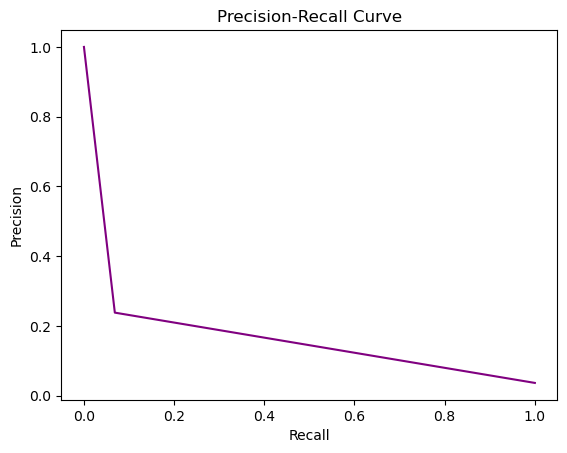

In [142]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# plot the prc curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

* **Precision (24%)**
  *   Percentage of loans flagged as defaulted that were correctly classified
  *   When the model predicts loan as defaulted, it is only correct 24% of the time

* **Recall (7%)**
  *   Percentage of actual defaulted loans that were correctly classified
  *   Model correctly identifies 7% of all defaulted loans

### Confusion Matrix
Further display the results with confusion matrix

Class distribution in testing set [1924   73]


True Postive Rate: 0.002504
True Negative Rate: 0.955433
False Postive Rate: 0.008012
False Negative Rate: 0.034051


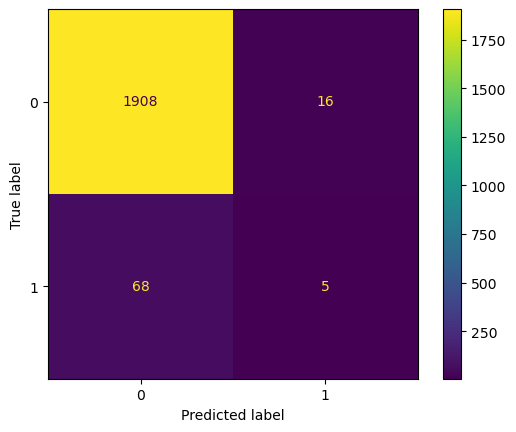

In [135]:
# display the confusion matrix
cm= confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=rf.classes_)
disp.plot()
print("Class distribution in testing set",np.bincount(y_test))
print("\n")

tn, fp, fn, tp =cm.ravel()
print("True Postive Rate: %f"%(tp/len(y_test)))
print("True Negative Rate: %f"%(tn/len(y_test)))
print("False Postive Rate: %f"%(fp/len(y_test)))
print("False Negative Rate: %f"%(fn/len(y_test)))

**Class 0 = Will pay back loan <br>
Class 1 = Will default loan** <br>

From the confusion matrix above, although the model is good at classifying whether the client will pay back the loan, it is not very good at identiying whether the client will default the loan. <br>

## Feature Selection

Based on the above results, the model is not able to perform very well. We can use some feature selection by only including some of the more important features in training.

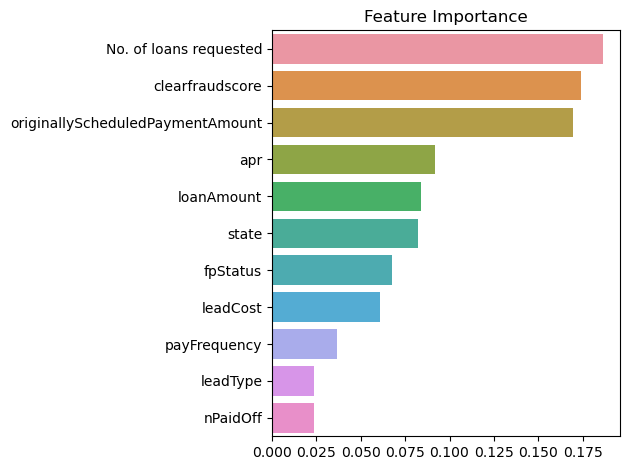

In [173]:

importances = rf.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = dataset.columns[1:]

"""
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))
"""
plt.title('Feature Importance')
sns.barplot( importances[sorted_indices],X_train.columns[sorted_indices])
plt.tight_layout()
plt.show()

In [175]:
# include only the top 3 features and the class label
dataset2 = dataset[['No. of loans requested','clearfraudscore','originallyScheduledPaymentAmount','loanStatus']]

y_col = 'loanStatus'
X = dataset2[dataset2.columns.drop(y_col)]
y = dataset2[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [176]:
# train 
rf2 = RandomForestClassifier(class_weight=class_weights, 
                                     criterion='gini',
                                     max_depth=110,
                                     min_samples_leaf = 2,
                                     n_estimators = 200,
                                     min_samples_split=2)
                                    
rf2.fit(X_train, y_train.ravel())

RandomForestClassifier(class_weight={0: 0.520323084940073,
                                     1: 12.801282051282051},
                       max_depth=110, min_samples_leaf=2, n_estimators=200)

Precision: 0.10526315789473684
Recall: 0.0273972602739726
F1-score: 0.043478260869565216


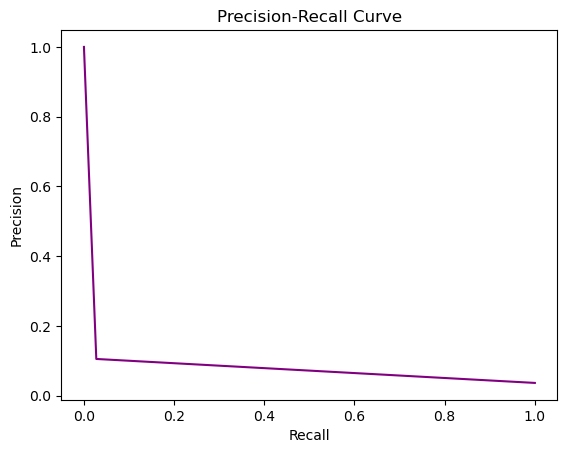

In [177]:
# evaluate 
y_pred = rf2.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# plot the prc curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

## Discussion & Thoughts

Although retraining with feature selection, the model is not able to perform better. The poor performance may be due to the model being overfitted on the majority class. For improvements in the future, choosing another way of handling the imbalanced data like oversampling or undersampling may help. Or perform more feature engineering to get more meaningful features for model to learn. 